# Fourier Series

https://docs.sympy.org/latest/tutorial/calculus.html

https://www.tutorialspoint.com/sympy/sympy_plotting.htm

https://docs.sympy.org/latest/modules/plotting.html#plotgrid-class

In [1]:
from sympy import *
import matplotlib.pyplot as plt
init_session()
init_printing(use_unicode=True)

import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

from IPython.display import display, Math, Latex

# remove/comment line below to get plots in a seperate window
%matplotlib inline

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [43]:
def plotPeriodicSympyFunctions(functions, xrange, periodify=(-pi, pi), variable=x):
    npoints=100
    xvalues=np.arange(xrange[0], xrange[1], (xrange[1]-xrange[0])/npoints)
    p0=np.float32(periodify[0])  # this is necessary to avoid a type-error while plotting
    p1=np.float32(periodify[1])
    period = p1-p0
    periodified=(xvalues - p0)%period + p0
    fig    = plt.figure(figsize=(10,6))
    for fc in functions:
        #name= "$" + latex(fc,order='rev-lex') + "$"
        yvalues=None
        if fc[0] == sympify('0'):
            yvalues=0*xvalues
        else:
            lfc = lambdify(variable, fc[0], "numpy")
            yvalues=lfc(periodified)
        #print(xvalues, yvalues)
        plt.plot(xvalues, yvalues, label=fc[1])
    plt.legend()
    plt.show()

def FourierSeries(stringFct, order=5, plotrange=(-3,3), periodify=(-pi, pi), variable=x, plotall=True, optLatex=False):
    s    = [None]*(2)
    
    s[0]  = (sympify(stringFct), stringFct)
    sall  = fourier_series(s[0][0], (x, periodify[0], periodify[1]))

    if plotall:
        s    = [None]*(order+2)
        for n in np.arange(order+1):
            name='$F_{' + str(n) + '}(x)$'
            s[n+1]=(sall.truncate(n=n), name)
    else:
        name='$F_{' + str(order) + '}(x)$'
        s[1] = (sall.truncate(n=order), name)

    string = "\\( " + latex(f) + " \\approx " + latex(s[-1][0],order='lex') + '\\)'
    display(Latex(string))
    if optLatex:
        print(string)
        
    plotPeriodicSympyFunctions(s, plotrange, periodify)


<IPython.core.display.Latex object>

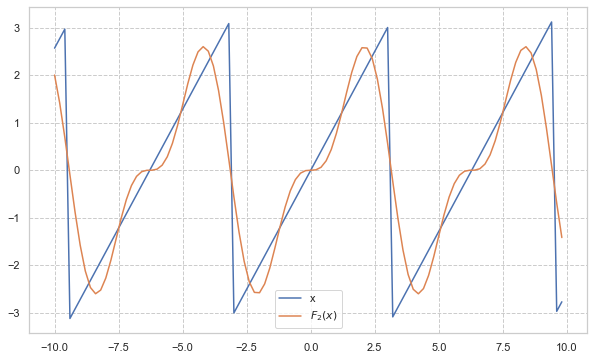

In [44]:
#for n in range(0, 5):
FourierSeries("x", 2, plotrange=(-10,10), plotall=False)